# UTP PPM 2024

---



# Naive Bayes Classifier

Tuliskan Nama, NIM, dan kelas Anda:

Nama : Gede Indra Adi Brata

NIM : 225150200111006

Kelas : PPM F

# Data Loading dan Data Inspection

## Data Loading

In [166]:
# Using VSCode
# from google.colab import files

# files.upload()

In [167]:
# Baca data menggunakan Pandas

import pandas as pd

df = pd.read_csv('Indra Brata - churn_cleaned.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection

In [168]:
df.iloc[:10, :-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes


In [169]:
df.iloc[:10, 10:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [171]:
import numpy as np
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].replace(np.NaN, df['TotalCharges'].mean())
df['tenure'] = df['tenure'].astype(float)


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


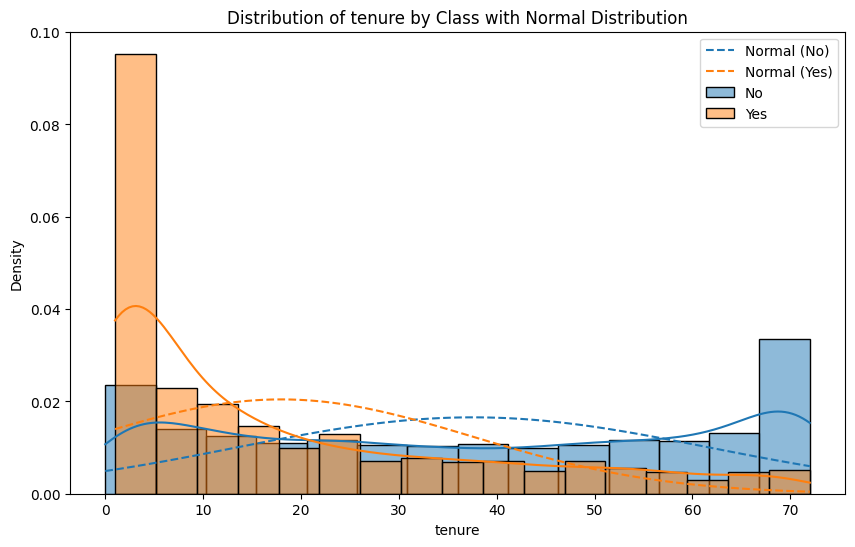

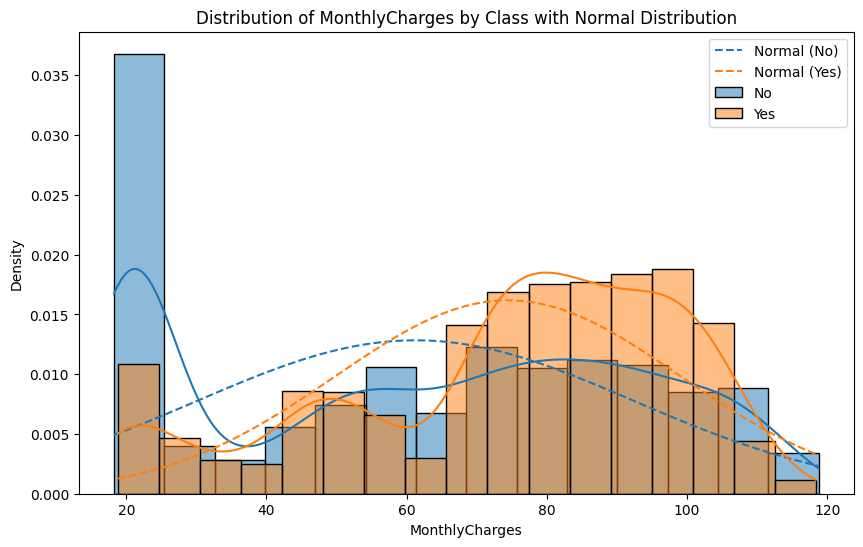

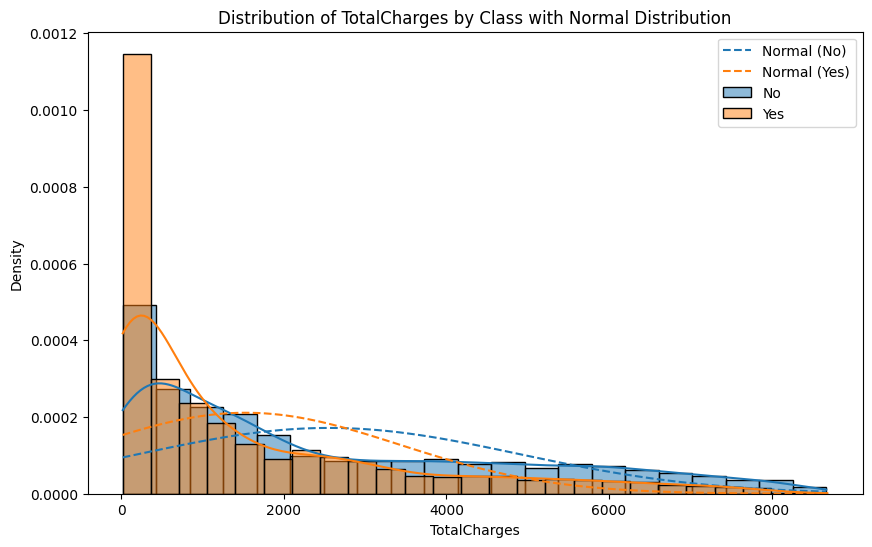

In [173]:
# Uji normalitas data kontinu dengan melakukan plotting setiap kelas yang ada

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

def plot_distribusi(dataframe, column_list, class_column):
    for column in column_list:
        plt.figure(figsize=(10, 6))
        for class_name in dataframe[class_column].unique():
            sns.histplot(dataframe[dataframe[class_column] == class_name][column], kde=True, label=class_name, stat='density')
            
            data = dataframe[dataframe[class_column] == class_name][column]
            mu, sigma = np.mean(data), np.std(data)
            x = np.linspace(data.min(), data.max(), 100)
            y = gaussian(x, mu, sigma)
            plt.plot(x, y, label=f'Normal ({class_name})', linestyle='--')

        plt.title(f'Distribution of {column} by Class with Normal Distribution')
        plt.legend()
        plt.show()


continous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plot_distribusi(df, continous_columns, df.columns[-1])

<Axes: xlabel='Churn', ylabel='count'>

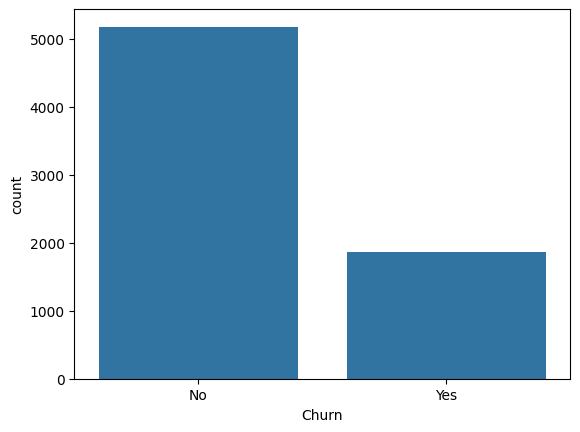

In [174]:
# Cek distribusi target kelas

sns.countplot(data=df, x=df['Churn'])

# Imbalance Handling

Jika dirasa perlu, lakukan imbalance handling menggunakan metode Oversampling, Undersampling, SMOTE, ataupun metode lainnya untuk meratakan distribusi target kelas



In [175]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def resampling(dataframe, target_column, method='over'):
  if method == 'over':
    resampler = RandomOverSampler()
  elif method == 'under':
    resampler = RandomUnderSampler()
  
  X = dataframe.drop(columns=target_column)
  y = dataframe[target_column]

  X_resampled, y_resampled = resampler.fit_resample(X, y)

  return pd.concat([X_resampled, y_resampled], axis=1)

In [176]:
df = resampling(df, df.columns[-1], method='under')

# Pemrosesan Awal Data Kontinu

## Standard Scaling

In [177]:
def standarisasi(df):
  list_column = ['tenure', 'MonthlyCharges', 'TotalCharges']
  for column in list_column:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
  return df

std_df = standarisasi(df)

## Normalization

In [178]:
def normalisasi(df):
    list_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for column in list_columns:
        max = df[column].max()
        min = df[column].min()
        df[column] = (df[column] - min) / (max - min)
    return df

norm_df = normalisasi(df)

# Modeling

Pemodelan dilakukan dengan penggabungan konsep Gaussian Naive Bayes dengan Multinomial Naive Bayes. Tidak diperbolehkan untuk melakukan rekayasa fitur dengan binning.

## Splitting Dataset

In [179]:
from sklearn.model_selection import train_test_split

data_latih, data_uji = train_test_split(df, test_size=0.3, random_state=101)

norm_data_latih, norm_data_uji = data_latih.copy(), data_uji.copy()
norm_label_uji = norm_data_uji.pop('Churn')

std_data_latih, std_data_uji = data_latih.copy(), data_uji.copy()
std_label_uji = std_data_uji.pop('Churn')

## Perhitungan Prior

In [180]:
from collections import Counter

def hitung_prior(list_kelas):
  prior = Counter(list_kelas)
  for key in prior.keys():
    prior[key] = prior[key] / len(list_kelas)
  return prior

## Menghitungan likelihood gaussian dan multinomial

In [181]:
import math

def hitung_mean_std_kelas(input_data):
  mean = {}
  std = {}
  class_columns_name = input_data.columns[-1]
  unique_class = set(input_data[class_columns_name])
  list_columns = input_data.columns[:-1]
  
  for column in list_columns:
    for a_class in unique_class:
      mean[(a_class, column)] = input_data.loc[input_data[class_columns_name] == a_class][column].mean()
      std[(a_class, column)] = input_data.loc[input_data[class_columns_name] == a_class][column].std()
  
  return (mean, std)

def likelihood_gaussian(input_data, mean, std):
  try:
    result = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((input_data-mean)**2))/(2*(std**2)))
    return result
  except ZeroDivisionError:
    return print('Error: Division by zero')

def likelihood_multinomial(input_data):
  list_columns = input_data.columns[:-1]
  class_column_name = input_data.columns[-1]
  list_class = input_data[class_column_name].unique()

  likelihood = {}
  for kolom in list_columns:
      for nilai_kolom in input_data[kolom].unique():
          for a_class in list_class:
              count_nom = input_data[(input_data[kolom] == nilai_kolom) & (input_data[class_column_name] == a_class)].shape[0]
              count_denom = input_data[input_data[class_column_name] == a_class].shape[0]
              likelihood[(kolom, nilai_kolom, a_class)] = count_nom / count_denom if count_denom != 0 else 0

  return likelihood

## Training Naive Bayes

In [182]:
def training_naive_bayes(data_latih):
  discrete_columns = []
  continous_columns = []
  
  for column in data_latih.columns[:-1]:
    if data_latih[column].dtype == 'float64':
      continous_columns.append(column)
    else:
      discrete_columns.append(column)
  
  class_columns_name = data_latih.columns[-1]
  prior = hitung_prior(data_latih[class_columns_name])
  (mean, std) = hitung_mean_std_kelas(pd.DataFrame(data_latih[continous_columns + [class_columns_name]]))
  list_class = list(set(data_latih[class_columns_name]))
  list_columns = data_latih.columns[:-1]
  likelihood = likelihood_multinomial(pd.DataFrame(data_latih[discrete_columns + [class_columns_name]]))
  
  model = {}
  model['prior'] = prior
  model['mean'] = mean
  model['std'] = std
  model['likelihood'] = likelihood
  model['list_class'] = list_class
  model['list_columns'] = list_columns
  return model


## Testing Naive Bayes

In [197]:
def testing_naive_bayes(model, data_uji):
  prior = model['prior']
  
  mean = model['mean']
  
  std = model['std']
  
  list_class = model['list_class']
  
  list_columns = model['list_columns']
  
  likelihood = model["likelihood"]
  
  posterior = dict.fromkeys(list_class, 1)
  
  for a_class in list_class:
    for column in list_columns:
      if type(data_uji[column]) == np.float64:
        posterior[a_class] = posterior[a_class] * likelihood_gaussian(data_uji[column], mean[(a_class, column)], std[(a_class, column)])
      else:
        posterior[a_class] = posterior[a_class] * likelihood[(column, data_uji[column], a_class)]
    posterior[a_class] = posterior[a_class] * prior[a_class]
  predict_class = max(posterior, key=posterior.get)
  return predict_class

# Analisis Klasifikasi

## Dataset Standarisasi

### Training Naive Bayes

In [198]:
model_std = training_naive_bayes(std_data_latih)

### Evaluasi Prediksi

In [199]:
prediksi_total_std =[]
for indeks in range(std_data_uji.shape[0]):
  prediksi_total_std.append(testing_naive_bayes(model_std, std_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_std==std_label_uji))

Total prediksi benar:  850


## Dataset Normalisasi

### Training Naive Bayes

In [186]:
model_norm = training_naive_bayes(norm_data_latih)

### Evaluasi Prediksi

In [187]:
prediksi_total_norm =[]
for indeks in range(norm_data_uji.shape[0]):
  prediksi_total_norm.append(testing_naive_bayes(model_norm, norm_data_uji.iloc[indeks]))
print("Total prediksi benar: ",sum(prediksi_total_norm==norm_label_uji))

Total prediksi benar:  850


# Kesimpulan

Soal

1. Apakah data kontinu dalam dataset menunjukkan kecenderungan distribusi normal?

2. Jika anda melakukan imbalance handling, mengapa hal tersebut perlu dilakukan?

3. Dalam hasil percobaan diatas, apakah efek dari standarisasi/normalisasi yang dilakukan terhadap data?

4. Dalam kasus yang diberikan, apakah model hybrid multinomial dan gaussian sudah optimal? Pengembangan apa saja yang dapat dilakukan?

Jawaban

1. Berdasarkan kolom yang memiliki data kontinu, yaitu 'tenure', 'MonthlyCharges',dan 'TotalCharges' dan hasil dari visualisasi menjadi histogram, terlihat bahwa data dari kolom-kolom tersebut belum memiliki distribusi normal. Dimana pada grafik terlihat garis putus-putus yang menggambarkan bagaimana data seharusnya tersebar sehingga membentuk distribusi normal. Namun persebaran data yang ada justru tidak sesuai dengan garis putus-putus dari tiap kelar. Selain itu terdapat data yang berlebihan pada suatu kelas sehingga data tersebut diperlukan proses imbalance handling.

2. Proses yang dilakukan disini adalah imbalance handling yang berupa UnderSampling. Pada grafik terlihat bahwa beberapa kelas  memiliki jumlah kelas yang lebih banyak dibanding kelas lainnya. Tentunya hal ini tidak bagus untuk proses modeling. Under sampling melibatkan pengurangan jumlah contoh dalam kelas mayoritas sehingga seimbang dengan jumlah contoh dalam kelas minoritas. Teknik ini dapat dilakukan dengan menghapus secara acak contoh dari kelas mayoritas atau menggunakan strategi yang lebih cermat seperti penghapusan berbasis cluster sehingga jumlah record yang ada di data tersebut menjadi berkurang. Dalam UnderSampling yang saya gunakan, saya menggunakan Random Under Sampling
 
3. Pada proses di atas dilakukan proses normalisasi dan standarisai. Pada proses normalisasi menggunakan algoritma MinMax dan pada proses standarisasi menggunakan Z-Score.
  - Normalisasi Min-Max mengubah nilai-nilai dalam dataset sehingga mereka berada dalam rentang tertentu, biasanya antara 0 dan 1. Efeknya adalah membuat semua data tersebar di seluruh rentang yang ditentukan (misalnya, 0 hingga 1), sehingga menjaga proporsi relatif antar-nilai.
  - Standarisasi Z-Score mengubah distribusi data sehingga memiliki mean (rata-rata) 0 dan standar deviasi (deviasi standar) 1. Efeknya adalah mengubah distribusi data sehingga nilai-nilai ekstrem di luar rentang yang biasa menjadi lebih terlihat. Ini juga membuat data lebih sesuai untuk model yang mengasumsikan distribusi normal, seperti banyak algoritma machine learning.

4. Menurut saya proses model hybrid multinomial dan gaussian sudah cukup optimal namun masih bisa dioptimalkan lagi dari beberapa aspek. Seperti proses penentuan data yang merupakan data kontinu atau diskrit, dalam proses ini proses yang saya buat masih melakukan pengecekan tiap kolom apakah data pada kolom ini memiliki distribusi normal atau tidak. Alangkah lebih baik apabila dibuat suatu proses yang bisa menentukan apakah data di dalam kolom tersebut memiliki distribusi normal(data kontinu) atau tidak tanpa melakukan pengecekan histogram ataupun sebaran data (visualisasi). Selain itu proses yang bisa ditingkatkan, yaitu ketika penentuan conditional probability (likelihood) pada data diskrit atau kontinu.